# Goldsmiths University of London
# MSc Data Science and Artificial Intelligence
# Final Project in Data Science (2023-24)
# Supervisor: Dr V L Raju Chinthalapati
# Author: Alperen Unal - aunal001
# Student ID: 33804283

## Phase 4- HAR-GARCH Model

## 1. Utilised Modules

In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## 2. Data Preprocessing

In [3]:
prediction_df = pd.read_csv("prediction_scaled_log_returns.csv")
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31339 entries, 0 to 31338
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   spot_btc_coin_volume                  31339 non-null  float64
 1   futures_btc_close_price               31339 non-null  float64
 2   futures_btc_coin_volume               31339 non-null  float64
 3   futures_btc_coin_open_interest_close  31339 non-null  float64
 4   futures_btc_funding_rate              31339 non-null  float64
 5   futures_btc_CVD                       31339 non-null  float64
 6   futures_eth_close_price               31339 non-null  float64
 7   futures_eth_coin_open_interest_close  31339 non-null  float64
 8   futures_eth_funding_rate              31339 non-null  float64
 9   futures_eth_CVD                       31339 non-null  float64
 10  eth_etf                               31339 non-null  int64  
 11  btc_etf        

In [4]:
df = prediction_df[['futures_btc_close_price', 'futures_btc_coin_volume',
                    'futures_btc_coin_open_interest_close', 'futures_btc_funding_rate',
                    'futures_btc_CVD', 'log_returns', 'volatility']]

In [5]:

start_date = '2021-01-02 00:00:00'
end_date = '2024-07-30 18:00:00'
freq = 'H'  

datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)

df = df.set_index(datetime_index)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31339 entries, 2021-01-02 00:00:00 to 2024-07-30 18:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   futures_btc_close_price               31339 non-null  float64
 1   futures_btc_coin_volume               31339 non-null  float64
 2   futures_btc_coin_open_interest_close  31339 non-null  float64
 3   futures_btc_funding_rate              31339 non-null  float64
 4   futures_btc_CVD                       31339 non-null  float64
 5   log_returns                           31339 non-null  float64
 6   volatility                            31339 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


In [7]:
df['log_returns_100'] = df['log_returns'] * 100

In [8]:

start_date = '2021-01-02 00:00:00'
end_date = '2024-07-30 18:00:00'
freq = 'H' 

datetime_index = pd.date_range(start=start_date, end=end_date, freq=freq)

df = df.set_index(datetime_index)

In [9]:
df

,futures_btc_close_price,futures_btc_coin_volume,futures_btc_coin_open_interest_close,futures_btc_funding_rate,futures_btc_CVD,log_returns,volatility,log_returns_100
2021-01-02 00:00:00,29215.89,11380.580,36013.363,0.000100,-1.080364e+04,-0.004142,0.005182,-0.414223
2021-01-02 01:00:00,29380.00,7693.401,35530.754,0.000100,-1.072782e+04,0.005601,0.004329,0.560143
2021-01-02 02:00:00,29347.02,6230.851,35781.508,0.000100,-1.051844e+04,-0.001123,0.004065,-0.112316
2021-01-02 03:00:00,29364.67,4118.911,35532.749,0.000100,-1.078220e+04,0.000601,0.004042,0.060124
2021-01-02 04:00:00,29363.03,4267.183,35487.117,0.000100,-1.094671e+04,-0.000056,0.004012,-0.005585
...,...,...,...,...,...,...,...,...
2024-07-30 14:00:00,65779.40,23581.410,84405.692,0.000050,-1.856454e+06,-0.008747,0.004975,-0.874706
2024-07-30 15:00:00,66198.00,20218.770,83619.759,0.000077,-1.856047e+06,0.006344,0.005225,0.634353
2024-07-30 16:00:00,66150.20,8097.586,83588.161,0.000092,-1.855806e+06,-0.000722,0.003993,-0.072234
2024-07-30 17:00:00,65839.80,15950.058,83142.319,0.000100,-1.856045e+06,-0.004703,0.004072,-0.470340


In [7]:
# Splitting
train_df = df.iloc[:-1440]
test_df = df.iloc[-1440:]

## 3. ModelTraining & Testing

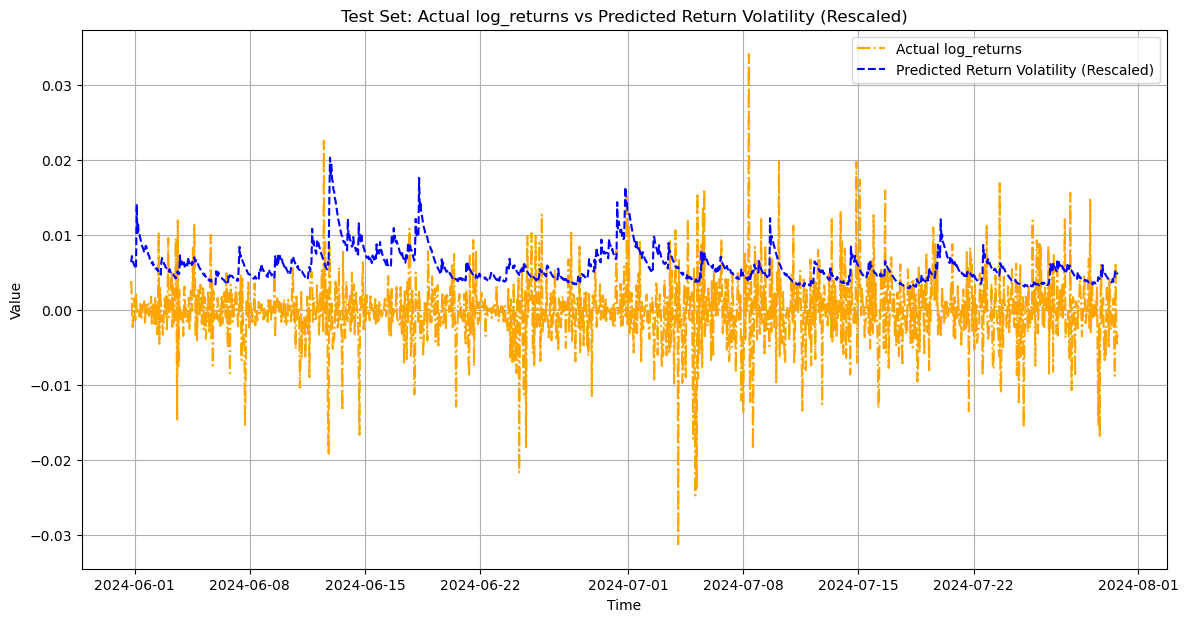

General Train MAE: 0.007422
General Test MAE: 0.006459


In [8]:
# Parameters are set
steps = len(test_df)
test_mae_values = []
train_mae_values = []  # A list is created for train MAE values
test_length = len(test_df)  # Test set size is determined based on the length of test_df

# All predictions and actual values are stored for the final combined plot
test_rolling_predictions = []
test_all_actuals = []

# Model training and rolling prediction are conducted without a gap
for i in range(test_length):
    # The train data is used for model training
    train_set = train_df['log_returns_100'][:-(test_length-i)].copy()
    
    # A GARCH model is defined with p=1, q=2, mean = 'HAR' and power = 2
    model = arch_model(train_set, vol='GARCH', p=1, q=2, mean='HAR', power=2)
    model_fit = model.fit(disp='off')
    
    # MAE is calculated for the training set
    train_pred = model_fit.conditional_volatility
    train_mae = mean_absolute_error(train_set / 100, train_pred / 100)
    train_mae_values.append(train_mae)
    
    # A test prediction is made
    val_pred = model_fit.forecast(horizon=1)
    val_pred_rescaled = np.sqrt(val_pred.variance.values[-1, :]) / 100  # Rescaling is done by dividing by 100

    # Prediction and actual volatility are stored
    test_rolling_predictions.append(val_pred_rescaled[0])
    test_all_actuals.append(test_df['volatility'].iloc[i])
    
    # MAE is calculated for validation (with rescaled predictions)
    test_mae = mean_absolute_error([test_df['log_returns_100'].iloc[i] / 100], val_pred_rescaled)
    test_mae_values.append(test_mae)

# A final combined plot for the test set is created
plt.figure(figsize=(14, 7))
plt.plot(test_df.index[:test_length], test_df['log_returns_100'] / 100, label='Actual log_returns', color='orange', linestyle='-.')  # Actual log_returns are plotted
plt.plot(test_df.index[:test_length], test_rolling_predictions, label='Predicted Return Volatility (Rescaled)', color='blue', linestyle='--')
plt.title('Test Set: Actual log_returns vs Predicted Return Volatility (Rescaled)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# General MAE for the train and test set is calculated
general_train_mae = np.mean(train_mae_values)
general_test_mae = np.mean(test_mae_values)

print(f"General Train MAE: {general_train_mae:.6f}")
print(f"General Test MAE: {general_test_mae:.6f}")

## 4. Comparing Actual Price vs Predicted Return Volatility

/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_3563/344333042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['futures_btc_close_price_scaled'] = scaler.fit_transform(test_df[['futures_btc_close_price']])
/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_3563/344333042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_return_volatility_scaled'] = scaler.fit_transform(np.array(test_rolling_predictions).reshape(-1, 1))


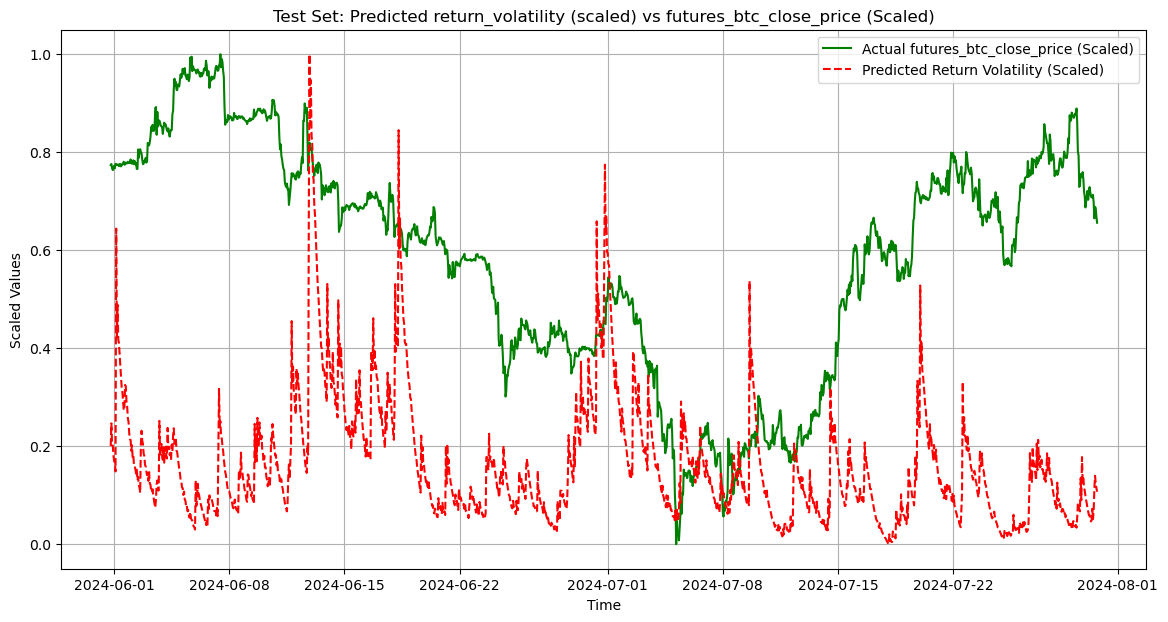

In [9]:
# The MinMaxScaler is defined and scaling is done between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# The futures_btc_close_price data is scaled
test_df['futures_btc_close_price_scaled'] = scaler.fit_transform(test_df[['futures_btc_close_price']])

# The predicted return volatility are scaled in the same way
test_df['predicted_return_volatility_scaled'] = scaler.fit_transform(np.array(test_rolling_predictions).reshape(-1, 1))


plt.figure(figsize=(14, 7))

# Actual futures_btc_close_price (Scaled) is plotted
plt.plot(test_df.index[:test_length], test_df['futures_btc_close_price_scaled'], label='Actual futures_btc_close_price (Scaled)', color='green', linestyle='-')

# Predicted return volatility (Scaled) are plotted
plt.plot(test_df.index[:test_length], test_df['predicted_return_volatility_scaled'], label='Predicted Return Volatility (Scaled)', color='red', linestyle='--')

plt.title('Test Set: Predicted return_volatility (scaled) vs futures_btc_close_price (Scaled)')
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

## 5. Comparison Actual log returns vs price

/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_3563/608984062.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['futures_btc_close_price_scaled'] = scaler.fit_transform(test_df[['futures_btc_close_price']])
/var/folders/wl/n7pq_5rj1bz43l8jft3ps3q40000gp/T/ipykernel_3563/608984062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['actual_log_returns_scaled'] = scaler.fit_transform(test_df['log_returns_100'].values.reshape(-1, 1) / 100)


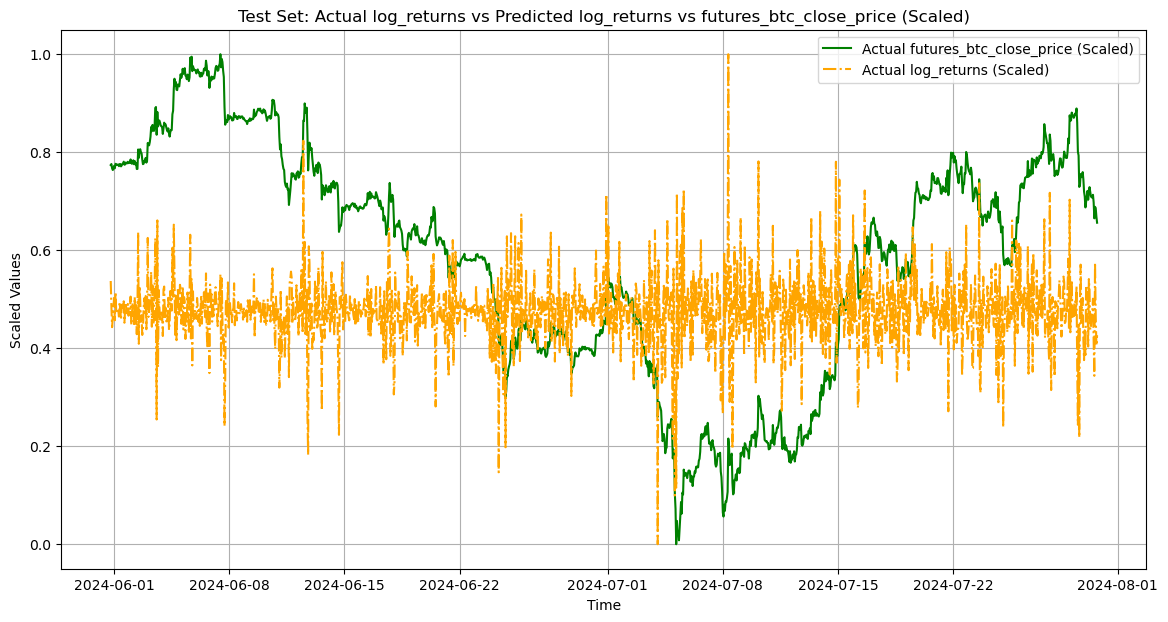

In [10]:
# Define the MinMaxScaler and scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
test_df['futures_btc_close_price_scaled'] = scaler.fit_transform(test_df[['futures_btc_close_price']])
test_df['actual_log_returns_scaled'] = scaler.fit_transform(test_df['log_returns_100'].values.reshape(-1, 1) / 100)
plt.figure(figsize=(14, 7))

plt.plot(test_df.index[:test_length], test_df['futures_btc_close_price_scaled'], label='Actual futures_btc_close_price (Scaled)', color='green', linestyle='-')
plt.plot(test_df.index[:test_length], test_df['actual_log_returns_scaled'], label='Actual log_returns (Scaled)', color='orange', linestyle='-.')

plt.title('Test Set: Actual log_returns vs Predicted log_returns vs futures_btc_close_price (Scaled)')
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

## 6. Conclusion

When we evaluate the first two graphs in comparison to the actual Bitcoin closing prices shown in the third graph, we can analyze the consistency and inconsistencies of the predicted log returns in terms of predicting downward liquidation cascades.

#### Consistency:
* In the first two graphs, the predicted return volatility (blue dashed line) generally spike before the price drops, indicating high volatility, which could signal the onset of downward liquidation cascades.
* Notably, around June 15, 2024, and July 1, 2024, in both the second and third graphs, there are clear spikes in the predicted log returns before significant drops in Bitcoin prices. This indicates a certain level of consistency in the model’s ability to anticipate downward liquidation cascades.
#### Inconsistency:
* However, there are instances where the model’s predictions and actual price movements do not align. For example, some predicted peaks in the second graph may not coincide perfectly with the price drops in the third graph. This suggests that the model may not always accurately predict downward liquidation cascades.
* The model seems to produce false positive signals, especially during periods of low volatility. Such occurrences could reduce the reliability of the model.

#### Importance and Value of the Model:

* The HAR-GARCH model’s potential to predict downward liquidation cascades is crucial for financial risk management. The model provides valuable insights, particularly during periods of high volatility, about how the markets might react.
* However, considering that the model might produce false positives, it is advisable to use it in conjunction with other risk management strategies.

## 7. Saving Predictions for LSTM

In [11]:
predictions_df = pd.DataFrame({
    'Date': test_df.index[:test_length],
    'Predicted_log_returns': test_rolling_predictions,
    'Actual_Volatility': test_all_actuals
})

# Display the DataFrame
predictions_df

,Date,Predicted_log_returns,Actual_Volatility
0,2024-05-31 19:00:00,0.006423,0.003308
1,2024-05-31 20:00:00,0.007226,0.003287
2,2024-05-31 21:00:00,0.006440,0.003306
3,2024-05-31 22:00:00,0.006441,0.003301
4,2024-05-31 23:00:00,0.006082,0.003299
...,...,...,...
1435,2024-07-30 14:00:00,0.004867,0.004975
1436,2024-07-30 15:00:00,0.005360,0.005225
1437,2024-07-30 16:00:00,0.005095,0.003993
1438,2024-07-30 17:00:00,0.004929,0.004072


In [12]:
predictions_df.to_csv('predicted_log_returns_har.csv', index=False)